#import Dependencies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset

In [8]:
nyc = pd.read_csv('flight_data.csv')

Looking at the data we arrive at below mentioned questions

Check for data shape, dtypes, info

In [10]:
nyc.shape

(336776, 19)

How Many Unique Destinations are there and what are they?

In [11]:
unique = len(nyc.dest.unique())
destin = nyc.dest.unique()
print(unique)
print(destin)

105
['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


How many flights were there from NYC to LAX in 2013?

In [12]:
flights = len(nyc[nyc.dest=='LAX'])
print(flights)

16174


How many airlines operate from NYC to LAX?

In [13]:
airlines = len(nyc[nyc.dest=='LAX'].groupby(nyc['carrier']))
print(airlines)

5


How many unique airlines fly from NYC?

In [14]:
flights = len(nyc[nyc.dest=='LAX'].groupby(nyc['tailnum']))
print(flights)

991


What is the average arrival delay at LAX?

In [16]:
a_delay = nyc[nyc.dest=='LAX']
de = round(a_delay['arr_delay'].mean() * 60)
print('The average arrival delay is:', de)

The average arrival delay is: 33


What proportions of flights fly to LAX from each NYC airport?

In [17]:
pflight = nyc[nyc.dest=='LAX'].groupby(nyc['origin']).size()
pflight['total'] = len(nyc[nyc.dest=='LAX'])
prop = pflight / pflight['total'] * 100
print('The proportion of flights flying to LAX from each NYC airport is:', prop)

The proportion of flights flying to LAX from each NYC airport is: origin
EWR       30.369729
JFK       69.630271
total    100.000000
dtype: float64


Which date has the largest average departure delay?

In [18]:
d_delay = pd.DataFrame(nyc['dep_delay'].groupby([nyc['day'],nyc['month']]).mean())
d_delay = d_delay.sort_values(['dep_delay'],ascending = False)
print(d_delay.head(1))

           dep_delay
day month           
8   3      83.536921


Which date has the largest average arrival delay?

In [34]:
a_delay = pd.DataFrame(nyc['arr_delay'].groupby([nyc['day'],nyc['month']]).mean())
a_delay = a_delay.sort_values(['arr_delay'],ascending=False)
a_delay.head(1)

,,arr_delay
day,month,
8,3,85.862155


What was the worst day to fly out of NYC

In [35]:
w_delay = pd.DataFrame(nyc[nyc.dep_delay >= 0].groupby([nyc['day'],nyc['month']]).count())
w1_delay = w_delay.sort_values(['dep_delay'],ascending=False)
w1_delay.head(1)

,,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
day,month,,,,,,,,,,,,,,,,,,,
23,12,710,710,710,710,710,710,709,710,708,710,710,710,710,710,708,710,710,710,710


Do we see any trend in the departure delays for flights from NYC?

       dep_delay
month           
1      10.036665
2      10.816843
3      13.227076
4      13.938038
5      12.986859
6      20.846332
7      21.727787
8      12.611040
9       6.722476
10      6.243988
11      5.435362
12     16.576688


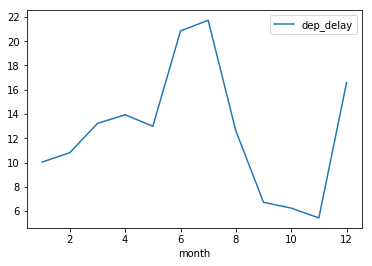

In [37]:
trend = pd.DataFrame(nyc['dep_delay'].groupby(nyc['month']).mean())
print(trend)

trend.plot()

We can see that the period from SEP-NOV has the lowest departure delays. and the departure delays seem to shoot up in december possibly due to the X-mas festival.

How does departure delay varies over the course of the day?

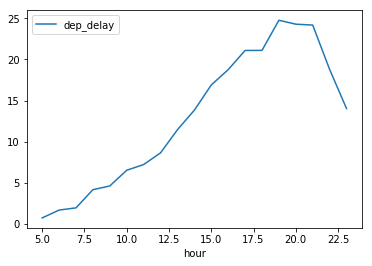

In [38]:
delay_h = pd.DataFrame(nyc['dep_delay'].groupby(nyc['hour']).mean())
delay_h.plot()

We can see that the evening flights are having more delay than the flights compared to morning.

Which is the fastest flying aircraft?

In [39]:
fastest = pd.DataFrame(nyc,columns=['tailnum','carrier'])
fastest['speed'] = round(nyc['distance'] / nyc['air_time'] * 60)
fastest = fastest.sort_values(['speed'],ascending=False)
fastest.head(1)

,tailnum,carrier,speed
216447,N666DN,DL,703.0


Which destinations have flights everyday?

In [40]:
daily = pd.DataFrame(nyc['dest'].groupby([nyc['origin'],nyc['flight'],nyc['carrier']]).size().rename('count'))
daily = daily.sort_values(['count'],ascending=False)
freq = daily[daily['count']==365]
print('Daily flights that fly are:', freq)

Daily flights that fly are:                        count
origin flight carrier       
LGA    371    B6         365
JFK    181    AA         365
       407    VX         365
       1357   AA         365
       359    B6         365
       251    VX         365
       1783   B6         365
       219    B6         365
       145    AA         365
       413    VX         365
       135    B6         365
LGA    1611   AA         365
JFK    5712   EV         365
       2159   DL         365
       2391   DL         365
       59     AA         365
       411    VX         365
LGA    431    B6         365
JFK    703    B6         365
EWR    119    AA         365
       15     UA         365


On an average how many flights depart from each of the aiports at NY and 
is there any association with the number of flights departing from the 
airport and the delays associated with each aiport, carriers and 
flight duration? Can we predict the delay of flights based on such factors?

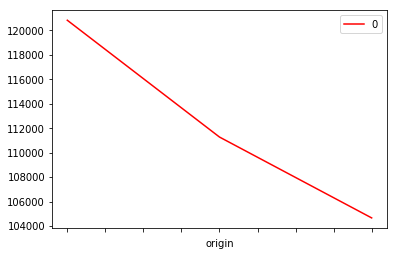

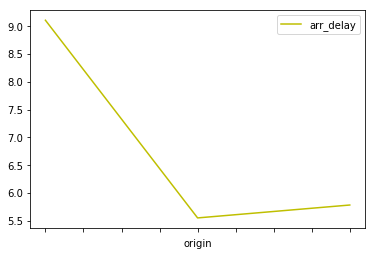

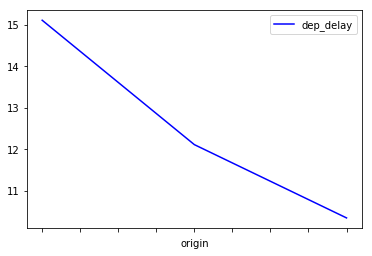

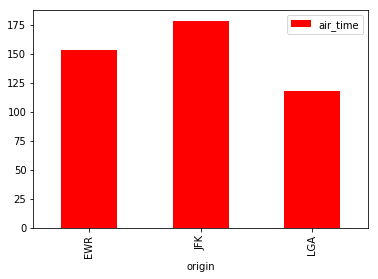

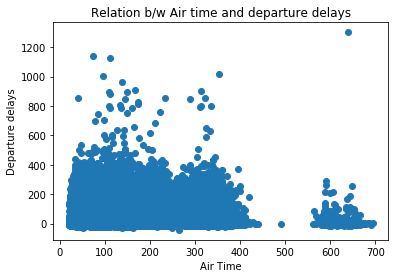

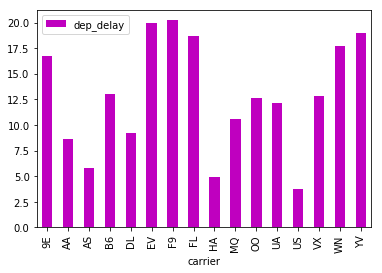

In [42]:
# Number of flights from each airport
df = nyc
df1 = pd.DataFrame(df.groupby('origin').size())
df1.plot(color='r')

# Average arrival delay from each airport
df2 = pd.DataFrame(df.groupby('origin')['arr_delay'].mean())
df2.plot(color='y')


# Average departure delay from each airport
df3 = pd.DataFrame(df.groupby('origin')['dep_delay'].mean())
df3.plot(color='b')


# Average airtime for each airport
df4 = pd.DataFrame(df.groupby('origin')['air_time'].mean())
df4.plot(kind='bar',color='r')


#Plot the relation between air time and departure delay
fig = plt.figure()
plt.scatter(df['air_time'],df['dep_delay'])
plt.xlabel('Air Time')
plt.ylabel('Departure delays')
plt.title('Relation b/w Air time and departure delays')

#Plot the relation between carriers and average departure delay

df5 = pd.DataFrame(df.groupby('carrier')['dep_delay'].mean())
df5.plot(kind = 'bar', color = 'm')


We can see that the departure delays are closely correlated with each other. EWR is the busiest airport and has highest delays because of high number of flights. We can see from scatter plot that as the airtime increases the delay shifts to little lower side. we can see that JFK has the highest air time, hence delay is little lesser than EWR.

The carriers EV, F9 have the highest departure delays and carriers such as US, HA have the lowest departure delays.
Since EWR experiences highest delays passengers can avoid this airport.